# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [2]:
human_files[0]

'/data/lfw/Dan_Ackroyd/Dan_Ackroyd_0001.jpg'

Number of faces detected: 1


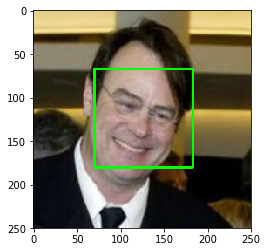

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

# What percentage of the first 100 images in human_files have a detected human face?
# set up a counter to count everytime a human face is detected
human_cnt = 0
# Loop through all the images in the human_files_short numpy array
for human in human_files_short:
    # use the face_detector() function to find out if a face is detected or not
    if face_detector(human) == True:
        human_cnt+=1

# calculate the percentage
human_per = (human_cnt/100)*100
print('Percentage of faces detected in human_files_short:', human_per)

# What percentage of the first 100 images in dog_files have a detected human face?
# set up a counter to count everytime a human face is detected
human_cnt = 0
# Loop through all the images in the dog_files_short numpy array
for human in dog_files_short:
    # use the face_detector() function to find out if a face is detected or not
    if face_detector(human) == True:
        human_cnt+=1

# calculate the percentage
human_per = (human_cnt/100)*100
print('Percentage of faces detected in dog_files_short:', human_per)


Percentage of faces detected in human_files_short: 98.0
Percentage of faces detected in dog_files_short: 17.0


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:

from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms
from torch.autograd import Variable
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    img = Image.open(img_path).convert('RGB')
        
    # VGG-16 takes 224x224 images as input, so we resize the input image
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                        transforms.ToTensor()
                                        ])
    img = data_transform(img)
    
    img = img.unsqueeze(0)
    
    # move model inputs to cuda, if GPU available
    if use_cuda:
        img = img.cuda()
    
    # Now that we have preprocessed our img, we need to convert it into a 
    # Variable; PyTorch models expect inputs to be Variables. A PyTorch Variable is a  
    # wrapper around a PyTorch Tensor.
    img = Variable(img)
    ## Return the *index* of the predicted class for that image
    
    # Pass the preprocessed image as input into the pre-trained network
    prediction = VGG16(img)
    
    # transform into an integer between 0 and 999
    #prediction = prediction.data.numpy().argmax()
    
    _, prediction = torch.max(prediction, 1)
    prediction = np.squeeze(prediction.numpy()) if not use_cuda else np.squeeze(prediction.cpu().numpy())
    
    return prediction # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    return  VGG16_predict(img_path)>=151 and VGG16_predict(img_path)<=268 # true/false


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

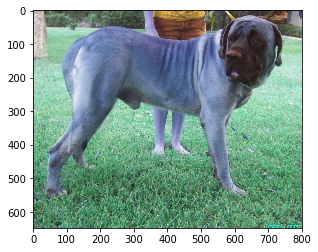

In [10]:
# display the image, along with bounding box
img = cv2.imread(dog_files_short[0])
plt.imshow(img)
plt.show()

__Answer:__ 


In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

#human_files_short = human_files[:100]
#dog_files_short = dog_files[:100]

# What percentage of the first 100 images in dog_files have a detected dog?
# set up a counter to count everytime a dog is detected
dog_cnt = 0
# Loop through all the images in the dog_files_short numpy array
for dog in human_files_short:
    # use the face_detector() function to find out if a face is detected or not
    if dog_detector(dog) == True:
        dog_cnt+=1
# calculate the percentage
dog_per = (dog_cnt/100)*100
print('Percentage of dogs detected in human_files_short:', dog_per)

# What percentage of the first 100 images in dog_files have a detected human face?
# set up a counter to count everytime a human face is detected
dog_cnt = 0
# Loop through all the images in the dog_files_short numpy array
for dog in dog_files_short:
    # use the face_detector() function to find out if a face is detected or not
    if dog_detector(dog) == True:
        dog_cnt+=1
# calculate the percentage
dog_per = (dog_cnt/100)*100
print('Percentage of dogs detected in dog_files_short:', dog_per)

Percentage of dogs detected in human_files_short: 1.0
Percentage of dogs detected in dog_files_short: 84.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [12]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [13]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets

# Load dog images for training from "dog_images/train"
dog_train = os.path.join('/data/dog_images/train') 
# Load dog images for validation from "dog_images/valid"
#dog_valid = os.path.join('/data/dog_images/valid')
# Load dog images for testing from "dog_images/test"
dog_test = os.path.join('/data/dog_images/test')

## Specify appropriate transforms, and batch_sizes
train_transform = transforms.Compose([transforms.Resize(224), # resizes the image to the desired square dimension, h=224,w=224
                                     transforms.RandomResizedCrop(224),
                                     transforms.RandomRotation(10),
                                     transforms.RandomHorizontalFlip(),                                     
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
                                    ])

# Going by the golden review I got, it does make sense to only augment the training set
# therefore, the test and validation set should only be resized to the desired input image dimensions
data_transform = transforms.Compose([transforms.Resize(224), # resizes the image to the desired square dimension, h=224,w=224                                    
                                     transforms.ToTensor()
                                    ])

train_data = datasets.ImageFolder(dog_train, transform=train_transform)
#valid_data =  datasets.ImageFolder(dog_valid, transform=data_transform)
test_data = datasets.ImageFolder(dog_test, transform=data_transform)

"""
The ImageFolder dataloader with return two elements for each image
These are; (sample, target) where target is class_index of the target class.

Ref: https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder
"""

datadir = '/data/dog_images/'

# Resize and Augment just the training set
dataset = {x: datasets.ImageFolder(os.path.join(datadir, x), train_transform)
                  for x in ['train']}

# Resize the test and validation set
dataset = {x: datasets.ImageFolder(os.path.join(datadir, x), data_transform)
                  for x in ['valid', 'test']}

# number of samples in a batch
#batch_size = 14 # increase batch size to improve training performance
batch_size = 30
# number of subprocesses to use for data loading
# 0 means main process is used
num_workers = 0
loaders_scratch = {
    x: torch.utils.data.DataLoader(dataset[x], shuffle=True, batch_size=batch_size, num_workers=num_workers)
    for x in ['train', 'valid', 'test']}

# print out some data stats
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))

#img = cv2.imread(train_data[0])
#plt.imshow(img)
#plt.show()

type(train_data[0]) # first column, sample column
#print(train_data[0][0])
im = train_data[0][0] # first column, first element, i.e. first sample
#convert image to numpy array
#im = np.asarray(im)
im = im.numpy()
print(im.shape)

image_shape = im.shape

Num training images:  6680
Num test images:  836
(3, 224, 224)


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

torchvision.transforms.Resize parameter was used to forcefully resize the image by stretching or compressing into the 224 by 224 height and width dimensions. Then RandomResizedCrop was used to ensure the image size is exactly the dimensions desired!
This input dimension was chosen to initially to implement VGG16 CNN architecture. But went for a different architecture after encountering training difficulties with VGG16's architecture.

Augmentation is a way of introducing variations into the the dataset. So the variation introduced are RandomRotation and RandomHorizontalFlip

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [14]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        '''
        Define convolutional layers that doubles the depth of the
        output until we get to a depth of 64
        
        A filter/kernel size of 3 so the padding should be 1 since
        only one pixel needs to be outside of the image boundary
        for the center pixel to overlay atop the image edge pixels
        '''
        
        in1 = 3
        in2 = 32
        in3 = 64
        in4 = 128
                        
        self.conv1 = nn.Conv2d(in1, in2, 3, padding=1)
        self.conv2 = nn.Conv2d(in2, in3, 3, padding=1)
        self.conv3 = nn.Conv2d(in3, in4, 3, padding=1)
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # the image dimension would have been reduced to 28x28 from 224x224 after 3 downscaling by half each time by MaxPooling
        self.fc1 = nn.Linear(in4 * 28 * 28, 500)
        # the image dimension would have been reduced to 14x14 from 224x224 after 4 downscaling by half each time by MaxPooling
        #self.fc1 = nn.Linear(in5 * 14 * 14, 500)
        # linear layer (500 -> 133)
        self.fc2 = nn.Linear(500, 133)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)
        
        """
        Always use normalization layers in your network. If you train the network with a large batch-size (say 10 or more),
        use BatchNormalization layer. Otherwise, if you train with a small batch-size (say 1), use InstanceNormalization
        layer instead
        
        Ref: https://towardsdatascience.com/a-bunch-of-tips-and-tricks-for-training-deep-neural-networks-3ca24c31ddc8
        
        torch.nn.BatchNorm2d(num_features, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        Ref: https://pytorch.org/docs/stable/nn.html#normalization-layers
        """
                       
        self.fclbatch_norm = nn.BatchNorm1d(num_features=500)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        # flatten image input
        x = x.view(x.size(0), -1)
        
        x = F.relu(self.fclbatch_norm(self.fc1(x)))
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
  (fclbatch_norm): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

Initially, VGG16's architecture was intended for the design of this CNN from scratch.
However, repeated training inefficiencies led to starting all over again with a very basic architecture
Three convolutional layers and two fully connected layers.
conv1 3,16
conv2 16,32
conv3 32,64

The Network performed better but not good enough
So increasing the convolution depth led to the final CNN configuration;
conv1 3,32
conv2 32,64
conv3 64,128

The Network performed even better.
Further attepmt to improve the training perfomance led to increasing the batch_size from 14 to 30
This yielded improved training performance. However, batch normalization is recommended when using high batch_size value
Thus a batch normalising layer was implemented and that drastically improved performance even further. This shows that batch normalisation works efficiently in other to remove bias in the network.

Attepmts to include dropout layers negatively affected the training performance instead so it was left out. This makes sense because dropout essentially ignores learned features. So it makes sense that the training performance will be negatively affected initially but should get much better later on since it prevents one node exerting significantly higher dominance during training compared to the others.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [15]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)
# The training loss keeps decreasing while the validation loss began to increase after reaching its lowest point
# decrease learning rate

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [16]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        #for batch_idx, (data, target) in loaders['train']:
        for data, target in loaders['train']:
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += loss.item()*data.size(0)
        
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        #for batch_idx, (data, target) in enumerate(loaders['valid']):
        for data, target in loaders['valid']:
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
            
        
        # calculate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
    # return trained model
    return model

In [17]:
# train the model
model_scratch = train(50, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.781082 	Validation Loss: 4.691439
Validation loss decreased (inf --> 4.691439).  Saving model ...
Epoch: 2 	Training Loss: 4.624380 	Validation Loss: 4.621172
Validation loss decreased (4.691439 --> 4.621172).  Saving model ...
Epoch: 3 	Training Loss: 4.527905 	Validation Loss: 4.529585
Validation loss decreased (4.621172 --> 4.529585).  Saving model ...
Epoch: 4 	Training Loss: 4.465771 	Validation Loss: 4.487777
Validation loss decreased (4.529585 --> 4.487777).  Saving model ...
Epoch: 5 	Training Loss: 4.393926 	Validation Loss: 4.414971
Validation loss decreased (4.487777 --> 4.414971).  Saving model ...
Epoch: 6 	Training Loss: 4.337714 	Validation Loss: 4.418044
Epoch: 7 	Training Loss: 4.292469 	Validation Loss: 4.344894
Validation loss decreased (4.414971 --> 4.344894).  Saving model ...
Epoch: 8 	Training Loss: 4.235757 	Validation Loss: 4.357486
Epoch: 9 	Training Loss: 4.177709 	Validation Loss: 4.292041
Validation loss decreased (4.344894 --> 4.

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [18]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.491148


Test Accuracy: 19% (164/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [19]:
## TODO: Specify data loaders


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [20]:
# Load the pretrained model from pytorch
model_transfer = models.vgg16(pretrained=True)
# already done in top level of the code

# print out the model structure
print(model_transfer)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [21]:
# print the number of input and output features
print(model_transfer.classifier[6].in_features) 
print(model_transfer.classifier[6].out_features) 

4096
1000


In [22]:
# Freeze training for all "features" layers    
# Features is just the name of the group that encompases all the
# the convolution and pooling layers in the network
for param in model_transfer.features.parameters():
    # for every weight in the network...
    param.requires_grad = False
    # the required gradient property is false

"""
pytorch automatically keeps track of the gradient of the training loss with respect
to the model weights, during training.
setting the required gradient properties for these weights to false will leave these
weights alone and would not be considered in gradient calculations
that means these weights are frozen and will stay at their pre-trained values
"""

'\npytorch automatically keeps track of the gradient of the training loss with respect\nto the model weights, during training.\nsetting the required gradient properties for these weights to false will leave these\nweights alone and would not be considered in gradient calculations\nthat means these weights are frozen and will stay at their pre-trained values\n'

In [23]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
# add a last linear layer  that maps n_inputs -> 133 dog breed classes
## new layers automatically have requires_grad = True

# [6] points to the last linear layer in the VGG16 classifier
n_inputs = model_transfer.classifier[6].in_features

# add last linear layer (n_inputs -> 133 dog breed classes)
# new layers automatically have requires_grad = True
# the new last layer need to take the same number of inputs
# as the existing last layer while producing as many outputs
# as our new number of classes
last_layer = nn.Linear(n_inputs, 133)

# Set the vgg16 last layer to equal the newly defined last layer
model_transfer.classifier[6] = last_layer

# after completing your model, if GPU is available, move the model to GPU
if use_cuda:
    model_transfer = model_transfer.cuda()
    
# check to see that your last layer produces the expected number of outputs
print(model_transfer.classifier[6].out_features)


133


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

The VGG16 pretrained CNN was chosen due to being a lot more familiar with it
And the network was trained for ImageNet competition which included dog breed classes so the feature extractor would perform beatifully for the dog breed classification task

Step 1: Load the pretrained model into model_transfer.

Step 2: Print the network achitecture to find the indices for final Linear Layer.

Step 3: Freeze the weights to retain their pretrained values.

Step 4: Add a final Linear layer to the network to output the desired number of output classes to repurpose it for the task at hand.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [24]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [32]:
# train the model
#model_transfer = # train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
# train the model
model_transfer = train(7, loaders_scratch, model_transfer, optimizer_transfer, 
                      criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 1.767860 	Validation Loss: 1.459956
Validation loss decreased (inf --> 1.459956).  Saving model ...
Epoch: 2 	Training Loss: 1.672099 	Validation Loss: 1.354474
Validation loss decreased (1.459956 --> 1.354474).  Saving model ...
Epoch: 3 	Training Loss: 1.550157 	Validation Loss: 1.265805
Validation loss decreased (1.354474 --> 1.265805).  Saving model ...
Epoch: 4 	Training Loss: 1.474437 	Validation Loss: 1.282985
Epoch: 5 	Training Loss: 1.438197 	Validation Loss: 1.219952
Validation loss decreased (1.265805 --> 1.219952).  Saving model ...
Epoch: 6 	Training Loss: 1.402549 	Validation Loss: 1.302380
Epoch: 7 	Training Loss: 1.335550 	Validation Loss: 1.223893


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [34]:
test(loaders_scratch, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.225082


Test Accuracy: 68% (570/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [27]:
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in dataset['train'].classes]
print(class_names[0:20])

['Affenpinscher', 'Afghan hound', 'Airedale terrier', 'Akita', 'Alaskan malamute', 'American eskimo dog', 'American foxhound', 'American staffordshire terrier', 'American water spaniel', 'Anatolian shepherd dog', 'Australian cattle dog', 'Australian shepherd', 'Australian terrier', 'Basenji', 'Basset hound', 'Beagle', 'Bearded collie', 'Beauceron', 'Bedlington terrier', 'Belgian malinois']


In [28]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
#class_names = [item[4:].replace("_", " ") for item in dataset['train'].classes]

def predict_breed_transfer(img_path):
    ### load the image and return the predicted breed
    
    # Load image
    img = Image.open(img_path).convert('RGB')
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                        transforms.ToTensor()#,
                                        #transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            #std=[0.229, 0.224, 0.225])
                                        ])
    img = data_transform(img)
    
    img = img.unsqueeze(0)
    
    # move model inputs to cuda, if GPU available
    if use_cuda:
        img = img.cuda()
    
    # get sample outputs
    output = model_transfer(img)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    
    return class_names[preds]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [35]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    # Use the transfer learning CNN model, model_transfer() to
    # A - detect a dog in the image and return the predicted breed
    # B - detect a human in the image and return the resembling dog breed
    # C - return an error output when neither is detected in the image
    
    # face_detector(img_path) returns True if a face is detected
    # dog_detector(img_path) returns True if a dog is detected
    # predict_breed_transfer(img_path) returns the predicted dog breed of the input image
    
    img = cv2.imread(img_path)
    plt.imshow(img)
    plt.show()
    
    if face_detector(img_path) == True:
        breed = predict_breed_transfer(img_path)
        return print('Thats clearly a human, however, its a dead ringer for a ', breed)
    
    elif dog_detector(img_path) == True:
        breed = predict_breed_transfer(img_path)
        return print('Thats a ', breed)
    
    else:
        return print('Beats me, I have no idea what that thing is... Yikes!')
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The algorithm cant be said to have performed badly!
The algorithm performed as it should however, the classifiers used by the algorithm is where the inaccuracies came from.
The model_transfer classifer works pretty well when differentiating between humans and dogs. However, putting a fennec fox in the classifier once classified it as a Chihuahua before being unable to classify.
All in all, the classifiers performed pretty well.

But the entire algorithms can be improved:

face_detector() is not a human detector. So if it cant see the face it will not detect a human

The model_transfer classifier can be trained for longer epochs improve detection accuracy

fine tuning for the model_transfer would improve the accuracy further as well



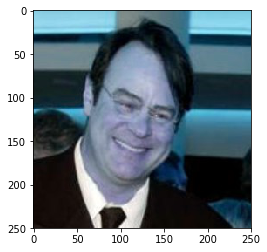

Thats clearly a human, however, its a dead ringer for a  Beagle


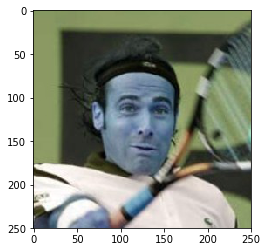

Thats clearly a human, however, its a dead ringer for a  Dogue de bordeaux


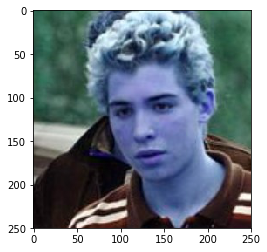

Thats clearly a human, however, its a dead ringer for a  Chinese crested


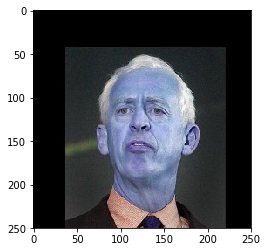

Thats clearly a human, however, its a dead ringer for a  Maltese


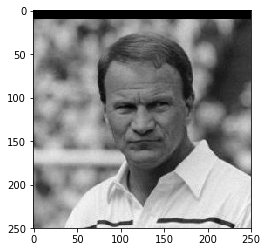

Thats clearly a human, however, its a dead ringer for a  Brittany


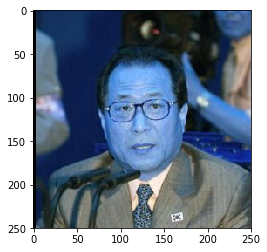

Thats clearly a human, however, its a dead ringer for a  Pharaoh hound


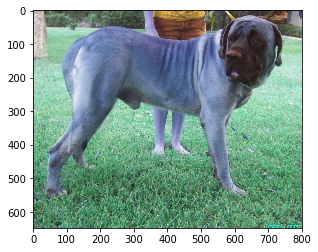

Thats a  Mastiff


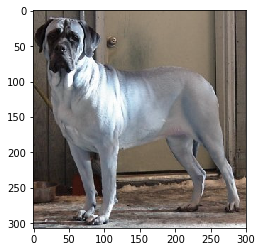

Beats me, I have no idea what that thing is... Yikes!


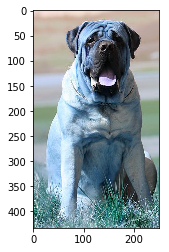

Thats a  Bullmastiff


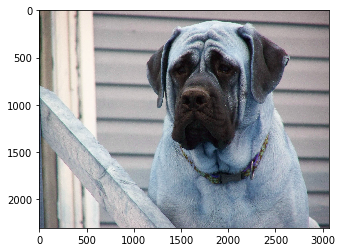

Thats a  Mastiff


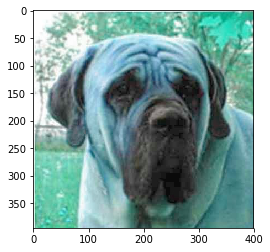

Beats me, I have no idea what that thing is... Yikes!


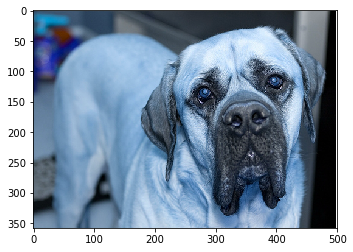

Thats a  Great pyrenees


In [36]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:6], dog_files[:6])):
    run_app(file)

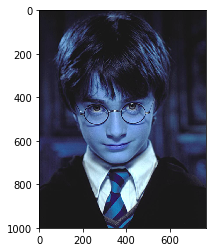

Thats clearly a human, however, its a dead ringer for a  Chinese crested


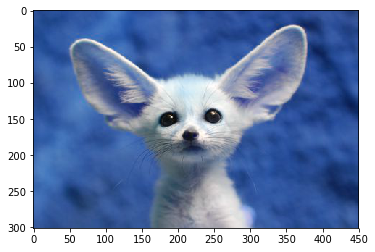

Beats me, I have no idea what that thing is... Yikes!


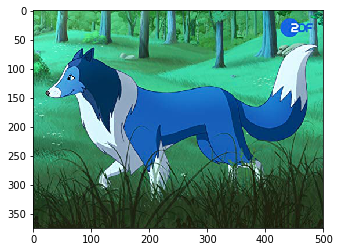

Beats me, I have no idea what that thing is... Yikes!


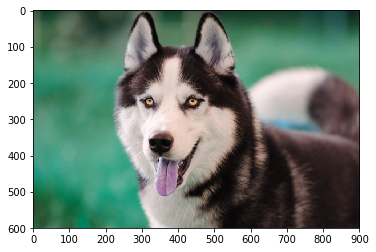

Thats clearly a human, however, its a dead ringer for a  Alaskan malamute


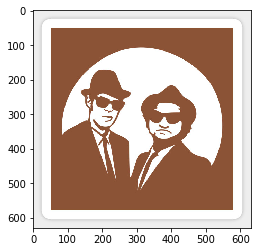

Thats clearly a human, however, its a dead ringer for a  Boxer


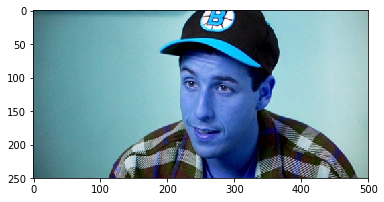

Thats clearly a human, however, its a dead ringer for a  Pharaoh hound


In [33]:
import os
import glob
img_dir = "comp_imgs/" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*.jpg')
files = glob.glob(data_path)
for i in files:
    #print(i)
    run_app(i)
    #imgs = cv2.imread(i)
    #plt.imshow(imgs)
    #plt.show()